# 국토 교통부 자동차 등록 현황 분석

## 1. Data Load
### 1.1. Connection 객체 만들기

In [1]:
def getEngine():
    import sqlalchemy
    from urllib import parse
    user = 'team3'
    password = 'Encore_team3@'
    host='192.168.0.95'
    port = 3306
    database = 'team3'
    password = parse.quote_plus(password)
    engine = sqlalchemy.create_engine(f"mysql://{user}:{password}@{host}:{port}/{database}")
    
    try:
        with engine.connect() as connection:
            print("Database connection successful!")
    except Exception as e:
        print(f"Database connection failed: {e}")

    return engine

### 1.2. DB로 부터 Data Load

In [2]:
def loadData(_engine):
    import pandas as pd
    return pd.read_sql('tb_car',con=_engine)

In [3]:
_engine = getEngine()
df = loadData(_engine)

Database connection successful!


In [24]:
)

,sido,gugun,passengerA,passengerB,passengerC,passengerT,vanA,vanB,vanC,vanT,...,cargoC,cargoT,specialA,specialB,specialC,specialT,totalA,totalB,totalC,totalT
month,,,,,,,,,,,,,,,,,,,,,
2011-01,서울,계,3969.0,2292616.0,146971.0,2443556.0,2493.0,157299.0,17198.0,176990.0,...,52648.0,366723.0,314.0,1062.0,2528.0,3904.0,10487.0,2761341.0,219345.0,2991173.0
2011-01,서울,강남구,163.0,192610.0,31456.0,224229.0,86.0,8261.0,1728.0,10075.0,...,1630.0,19198.0,21.0,94.0,134.0,249.0,431.0,218372.0,34948.0,253751.0
2011-01,서울,강동구,81.0,107074.0,6261.0,113416.0,50.0,8159.0,703.0,8912.0,...,2096.0,17662.0,10.0,34.0,157.0,201.0,256.0,130718.0,9217.0,140191.0
2011-01,서울,강북구,103.0,55201.0,2585.0,57889.0,47.0,5189.0,727.0,5963.0,...,1434.0,10215.0,10.0,15.0,17.0,42.0,302.0,69044.0,4763.0,74109.0
2011-01,서울,강서구,111.0,132643.0,15523.0,148277.0,58.0,9761.0,1254.0,11073.0,...,2672.0,21757.0,13.0,80.0,88.0,181.0,349.0,161402.0,19537.0,181288.0
2011-01,서울,관악구,146.0,94175.0,3508.0,97829.0,90.0,7039.0,318.0,7447.0,...,1984.0,14344.0,7.0,14.0,90.0,111.0,399.0,113432.0,5900.0,119731.0
2011-01,서울,광진구,104.0,72214.0,2723.0,75041.0,49.0,5316.0,344.0,5709.0,...,1345.0,12180.0,7.0,20.0,42.0,69.0,313.0,88232.0,4454.0,92999.0
2011-01,서울,구로구,90.0,94744.0,17026.0,111860.0,60.0,7085.0,1337.0,8482.0,...,2182.0,18186.0,8.0,32.0,44.0,84.0,285.0,117738.0,20589.0,138612.0
2011-01,서울,금천구,25.0,51921.0,2160.0,54106.0,13.0,4824.0,433.0,5270.0,...,2274.0,13431.0,1.0,30.0,39.0,70.0,98.0,67873.0,4906.0,72877.0


In [17]:
df.index = df.month.apply(lambda x : x.strftime('%Y-%m'))
# type()

In [23]:
df.drop(['seq','month'], axis=1, inplace=True)

## 2. 분석 

### 2.1. 2024년 10월 시도별 등록 차량 수

In [92]:
def drawSido(_df):
    import matplotlib.pyplot as plt
    plt.rc('font', family='NanumGothic')
    _df.loc[(_df['gugun'] == '계') ,['sido','passengerT','vanT','cargoT', 'specialT']].loc['2024-10'].plot.bar(x='sido', rot=0)

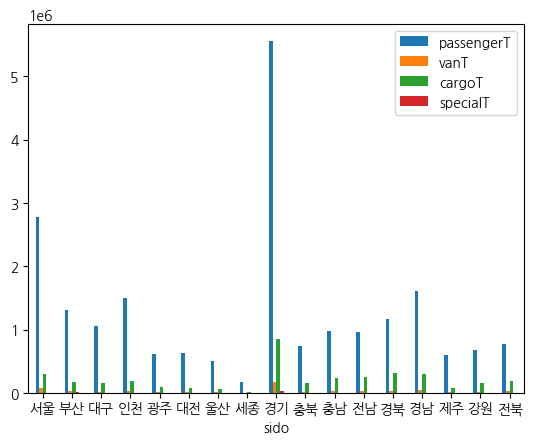

In [93]:
drawSido(df)

In [76]:
df.loc[(df['gugun'] == '계') ,['sido','passengerT','vanT','cargoT', 'specialT']].loc['2024-10']

,sido,passengerT,vanT,cargoT,specialT
month,,,,,
2024-10,서울,2773641.0,86305.0,306353.0,11565.0
2024-10,부산,1320722.0,35652.0,184403.0,12456.0
2024-10,대구,1067047.0,26468.0,161067.0,5294.0
2024-10,인천,1498956.0,38617.0,201474.0,9457.0
2024-10,광주,615299.0,16659.0,93120.0,4105.0
2024-10,대전,627964.0,16653.0,85947.0,3912.0
2024-10,울산,516238.0,12658.0,73599.0,3756.0
2024-10,세종,179317.0,4125.0,17359.0,903.0
2024-10,경기,5551623.0,175498.0,858798.0,31495.0


### 2.1. 서울 과 경기 지역의 등록 차량 증가 추이

In [90]:
def drawData(_df):
    _df.loc[(_df['sido'] == '서울') & (_df['gugun']=='계'),['passengerT','vanT','cargoT', 'specialT']].plot.line(figsize=(8,5))
    _df.loc[(_df['sido'] == '경기') & (_df['gugun']=='계'),['passengerT','vanT','cargoT', 'specialT']].plot.line(figsize=(8,5))

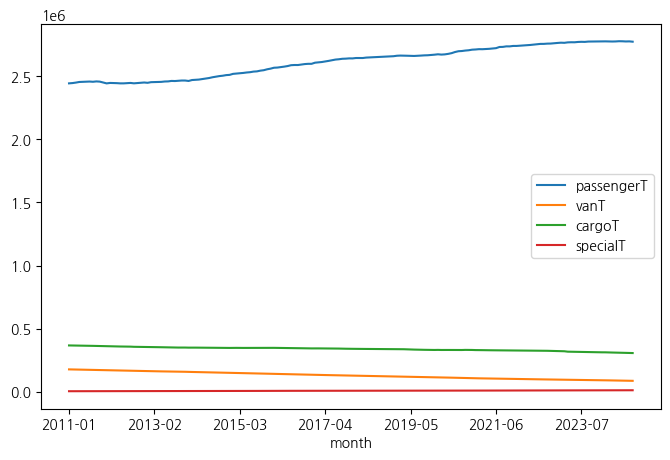

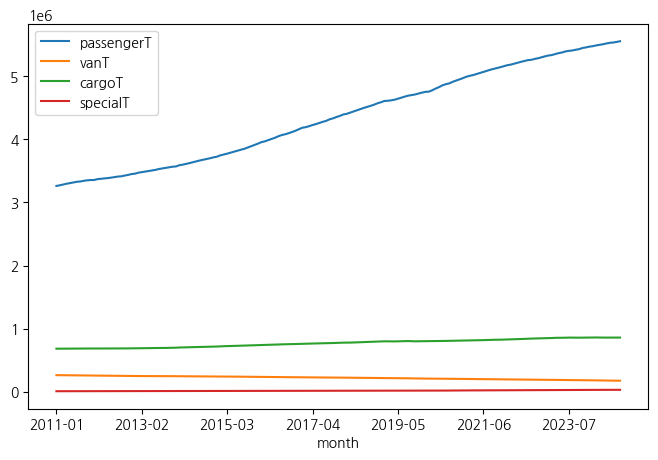

In [91]:
drawData(df)